# Decision Trees y Random Forest con Python y scikit-learn

https://deepnote.com/app/mazzaroli/Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn-22e03409-93bd-4c7e-9ade-f94470cd6941

En el campo del aprendizaje automático, los árboles de decisión (Decision Trees) y los bosques aleatorios (Random Forest) son dos de las herramientas más comunes y poderosas utilizadas para la clasificación y la predicción. 

En este artículo, exploraremos qué son exactamente estos modelos, cómo funcionan y cómo podemos implementarlos en nuestro propio proyecto individual utilizando Scikit-Learn, una biblioteca de aprendizaje automático de código abierto en Python.

# ¿Qué son los árboles de decisión?

Los **árboles de decisión** son un modelo de aprendizaje automático supervisado que se utiliza tanto para la clasificación como para la regresión. Son ampliamente extendidos debido a su simplicidad, facilidad de interpretación y versatilidad en diversas aplicaciones.

Los árboles de decisión aprenden de los datos generando reglas de tipo if-else y divisiones conocidas como nodos. Cada nodo representa una pregunta sobre los datos y cada rama del árbol representa una respuesta a esa pregunta. El proceso continúa hasta que se llega a una hoja del árbol, que representa la predicción final.

Existen varios algoritmos que pueden utilizarse para construir árboles de decisión, como **ID3, C4.5 y CART**. Las primeras versiones de los árboles de decisión fueron propuestas por Leo Breiman en la década de 1980.

Los árboles de decisión se utilizan comúnmente en tareas de clasificación, como la detección de spam en el correo electrónico o la clasificación de clientes en grupos de segmentación de mercado. También se utilizan en tareas de regresión, como la predicción de precios de bienes raíces.

**Ejemplo**

Supongamos que queremos decidir si comprar o no un coche usado. El árbol de decisión podría ser el siguiente:

* ¿El coche tiene menos de 5 años?
  * Sí: ¿El coche tiene menos de 50,000 km?
    * Sí: Comprar el coche.
    * No: No comprar el coche.
  * No: ¿El coche tiene menos de 80,000 km?
    * Sí: Comprar el coche.
    * No: No comprar el coche.
    
Este árbol tiene dos nodos, con cada nodo representando una pregunta y cada rama representando una posible respuesta. En función de las respuestas a las preguntas, se llega a una hoja que indica si se debe comprar o no el coche usado.



# Tu primer árbol de decisión con scikit-learn

Utilizaremos el dataset Titanic de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [1]:
# importamos las librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv', sep = ',')

# Análisis de datos para tu primer árbol de decisión

### Atributos

1. El conjunto de datos Titanic de CS109 contiene 887 filas y 8 columnas.

2. Survived (Sobrevivió): indica si el pasajero sobrevivió al hundimiento del Titanic (0 = No, 1 = Sí).

3. Pclass (Clase de pasajero): indica la clase del pasajero (1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase).

4. Name (Nombre): el nombre completo del pasajero.

5. Sex (Género): el género del pasajero (Masculino o Femenino).

6. Age (Edad): la edad del pasajero en años.

7. Siblings/Spouses Aboard (Hermanos/Cónyuges a bordo): el número de hermanos/cónyuges del pasajero que también estaban a bordo del Titanic.

8. Parents/Children Aboard (Padres/Hijos a bordo): el número de padres/hijos del pasajero que también estaban a bordo del Titanic.

9. Fare (Tarifa): la tarifa pagada por el pasajero por su viaje en el Titanic.

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


* Se eliminará la columna "Fare" ya que esta información está altamente correlacionada con la columna "Pclass" que nos indica la clase social del pasajero. Además, se eliminará la columna "Name" ya que no es relevante para el análisis que se realizará.

* ⚠
Antes de eliminar cualquier columna de un conjunto de datos, es importante tener una comprensión completa de los datos y el objetivo del análisis. Además, siempre es recomendable consultar con otros expertos o interesados en los datos para asegurarse de que no se está eliminando información importante o relevante.

* ⚠
las columnas "Fare" y "Name" en el dataset Titanic de CS109 contienen información importante. La columna "Fare" representa el precio del billete pagado por cada pasajero, lo que puede ser útil para analizar la relación entre la tarifa y la clase de pasajero. Por otro lado, la columna "Name" contiene información sobre el nombre de cada pasajero, que podría ser útil para el análisis de patrones de nombres o la búsqueda de información adicional sobre individuos específicos. Sin embargo, en el contexto de un análisis específico de la supervivencia de los pasajeros en el Titanic, estas columnas pueden no ser relevantes y por lo tanto podrían ser eliminadas para simplificar el conjunto de datos.

In [4]:
# Eliminamos las columnas que no necesitamos
titanic.drop(['Name', 'Fare'], axis = 1, inplace = True)

In [5]:
# Renombramos las columnas Siblings/Spouses Aboard y Parents/Children Aboard por SibSp y ParCh
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [6]:
# Visualizamos los tipos de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


In [7]:
# Cambiamos el tipo de dato de "Sex" ya que los algoritmos funcionan mucho mejor con datos numericos
titanic = pd.get_dummies(data = titanic, columns = ['Sex'], drop_first = True)

In [8]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
ParCh         int64
Sex_male       bool
dtype: object

In [9]:
titanic.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


# Entrenamiento de algoritmo

In [10]:
# Analizamos la proporción de la variable objetivo "survived"
print(titanic.Survived.value_counts())
print(titanic.Survived.value_counts(normalize = True))

Survived
0    545
1    342
Name: count, dtype: int64
Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64


Podemos observar que no está muy balanceada por lo que utilizaremos una libreria para balancear de mejor forma los datos y entrenar el algoritmo con dichos datos

In [11]:
# Importamos libreria para balancear los datos
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state = 42)

In [12]:
# Separamos X e y
X = titanic.drop('Survived', axis = 1)
y = titanic.Survived

In [13]:
# Balanceamos los datos
X_over, y_over = undersample.fit_resample(X, y)
y_over.value_counts(normalize = True)

Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

In [14]:
# importamos las librerias necesarias para dividir el dataset
from sklearn.model_selection import train_test_split

# Dividimos el datasets 30% para el Test y 70% para entrenamiento
X_train, X_test , y_train, y_test = train_test_split(X_over, y_over, shuffle= True, test_size = 0.3, random_state = 42)

In [15]:
# Importamos las librerias para la creación del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Definir el clasificador y los valores de los hiperparametros a probar
clf = DecisionTreeClassifier(random_state = 42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# realizar la busqueda de hiperparametros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid = param_grid, cv = 10, return_train_score = True)
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print('Mejores Hiperparametros encontrados')
print(grid_search.best_params_)
print('Mejor puntuación de validación cruzada')
print(grid_search.best_score_)

Mejores Hiperparametros encontrados
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada
0.7908687943262411


In [16]:
# Modelo Decision Tree con parametros oprtimizados
best_clf = grid_search.best_estimator_
best_clf

DecisionTreeClassifier(max_depth=4, random_state=42)

In [17]:
# Predecimos y
y_pred = best_clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1])

#### Evaluación del modelo

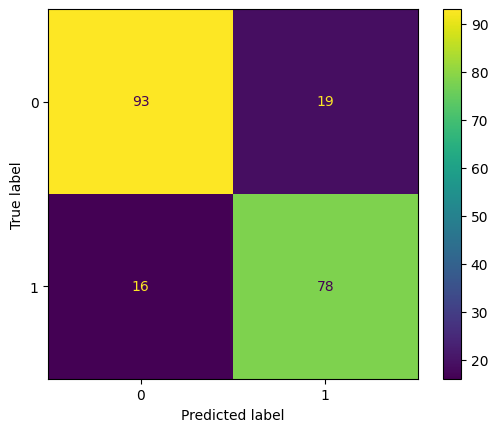

In [18]:
# Graficamos la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels = best_clf.classes_).plot();

In [19]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred))

El accuracy en train es: 0.8179916317991632
El accuracy en test es: 0.8300970873786407


In [21]:
feature_scores_titanic = pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)).T
feature_scores_titanic

,Sex_male,Age,Pclass,SibSp,ParCh
0,0.578417,0.22318,0.175741,0.022662,0.0


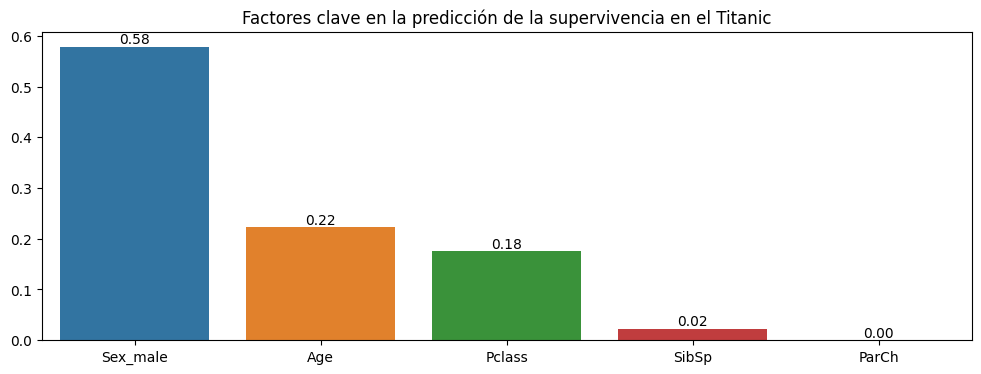

In [22]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()

* Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Age y luego de Pclass.

* SibSp y ParCh no tienen un impacto significativo en la capacidad del modelo para predecir la variable objetivo, se podrían eliminar sin afectar la capacidad de predicción.

* Es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo.

# ¿Cuándo usar árboles de decisión?
#### Ventajas

* Algoritmo de caja blanca: los árboles de decisión son considerados algoritmos de caja blanca, lo que significa que son modelos fácilmente interpretables y comprensibles por los humanos.

* Resultados fáciles de interpretar y entender: como se mencionó anteriormente, los árboles de decisión son modelos fáciles de interpretar y entender, ya que cada paso en el proceso de toma de decisiones se representa explícitamente. Esto permite que los expertos del dominio puedan validar el modelo y dar sugerencias para mejorarlo.

* Las combinaciones de los mismos pueden dar resultados muy certeros: los árboles de decisión individuales pueden ser limitados en términos de precisión de predicción. Sin embargo, una técnica que se utiliza para mejorar la precisión de los árboles de decisión es la combinación de varios árboles en un conjunto, como en el caso de Random Forest. Esto se conoce como ensamblaje de modelos y puede proporcionar una mayor precisión en las predicciones.

#### Desventajas

* Tendencia al sobreajuste u overfitting: los árboles de decisión tienen una tendencia natural a sobreajustarse o overfitting, lo que significa que pueden ajustarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de poda o regularización.

* Influencia de los outliers: los outliers o valores atípicos pueden tener una influencia significativa en la creación de los árboles de decisión, ya que pueden sesgar la partición de los datos. Una solución a esto es utilizar técnicas de preprocesamiento de datos para tratar con los outliers antes de crear el árbol.

* Arboles demasiado complejos pueden no adaptarse bien a los nuevos datos: si se crean árboles de decisión demasiado complejos, pueden adaptarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de poda o regularización para simplificar el árbol.

* Posibilidad de crear árboles sesgados si una clase es más numerosa: si una clase es significativamente más numerosa que las demás clases, el árbol de decisión puede estar sesgado hacia esa clase mayoritaria y no prestar suficiente atención a las otras clases. Esto se puede prevenir mediante técnicas de balanceo de clases, como el muestreo estratificado o el aumento de datos.

# ¿Cuándo usar árboles de decisión?


* Sencillo y fácil de entender: los árboles de decisión son una técnica sencilla y fácil de interpretar. Por lo tanto, es recomendable utilizarlos cuando se busca una solución clara y fácil de entender. Además, la estructura de árbol es intuitiva y fácil de visualizar, lo que hace que el proceso de toma de decisiones sea más fácil de entender.

* Funcionan bastante bien con grandes conjuntos de datos: los árboles de decisión pueden funcionar muy bien con grandes conjuntos de datos. A medida que el tamaño del conjunto de datos aumenta, los árboles de decisión se vuelven más útiles, ya que pueden segmentar el conjunto de datos en grupos más pequeños y más manejables para un análisis más profundo.

* Relativamente robusto: los árboles de decisión son relativamente robustos y pueden manejar datos faltantes o ruidosos. Además, son útiles en situaciones en las que se necesitan resultados precisos con una alta tasa de precisión.

* Método útil para analizar datos cuantitativos: los árboles de decisión son particularmente útiles para analizar datos cuantitativos. Por ejemplo, en el análisis de negocios, los árboles de decisión pueden ayudar a identificar patrones en grandes conjuntos de datos y hacer recomendaciones basadas en esa información.

* Aplicable para clasificación y regresión: los árboles de decisión se pueden utilizar para problemas de clasificación y regresión. En problemas de clasificación, se utiliza para asignar una etiqueta a un objeto, mientras que en problemas de regresión, se utiliza para predecir una variable continua.

# Proyecto práctico: árboles de decisión

Data comes frome:https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

En este proyecto, exploraremos el conjunto de datos "Car Evaluation Data Set" y utilizaremos árboles de decisión para construir un modelo de clasificación capaz de predecir la calidad de compra de un automóvil.

## Conociendo nuestro dataset

El conjunto de datos "Car Evaluation Data Set" es un conjunto de datos público que consta de 1728 instancias etiquetadas con la clase de calidad de compra del automóvil. Cada instancia tiene 6 atributos discretos: precio, mantenimiento, número de puertas, capacidad de personas, tamaño del maletero y seguridad.

Los atributos son definidos de la siguiente manera:

* price (Precio): representa el costo del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

* maint (Mantenimiento): representa el costo de mantenimiento del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

* doors (Número de puertas): representa la cantidad de puertas que tiene el automóvil. Los valores posibles son '2', '3', '4' y '5more' (5 o más).

* persons (Capacidad de personas): representa la capacidad de personas que puede transportar el automóvil. Los valores posibles son '2', '4', 'more' (más de 4).

* lug_boot (Tamaño del maletero): representa el tamaño del maletero del automóvil. Los valores posibles son 'small' (pequeño), 'med' (medio) y 'big' (grande).

* safety (Seguridad): representa la calidad de seguridad del automóvil. Los valores posibles son 'low' (baja), 'med' (media) y 'high' (alta).

* Class (Evaluación de la calidad de los automóviles):. Esta variable objetivo tiene cuatro posibles valores de clasificación: "unacc" (inaceptable), "acc" (aceptable), "good" (bueno) y "vgood" (muy bueno).

In [23]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [24]:
# Cargaremos los datos
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header = None)
columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']
df_car.columns = columns_names

In [25]:
# Visualizamos una muestras del DataFrame
df_car.head()

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
# Tipos de datos
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [27]:
# Verificamos si existe algun valor nulo
df_car.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

#### Distribución de frecuencia y distribuciones

In [28]:
# Creamos funcion de conteo y frecuencia de datos (esto es opcional ya que solo se puede hacer con la variable objetivo y no sería necesario crear una función)
def dist(df, target):
    count = df[target].value_counts(normalize = False)
    prop = df[target].value_counts(normalize = True)

    dist = pd.DataFrame({'Freq[N]': count, 'Prop[%]': prop.round(3)})
    return dist

In [29]:
for i in columns_names:
    print(' '*7, i.upper()) # agregamos el nombre de la columna centrada
    print(dist(df_car, i))# imprime la función
    print('*'*23) #imprime un divisor

        PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      432     0.25
***********************
        PERSONS
         Freq[N]  Prop[%]
persons                  
2            576    0.333
4            576    0.333
more         576    0.333
***********************
        LUG_BOOT
          Freq[N]  Prop[%]
lug_boot                  
small         576    0.333
med           576    0.333
big           576    0.333
***********************
        SAFETY
        Freq[N]  Prop[%]
safety                  
low         576    0.333
med         576   

# Analisis exploratorio de datos

0 price 0 0
1 maint 1 0
2 doors 0 1
3 persons 1 1
4 lug_boot 0 2
5 safety 1 2


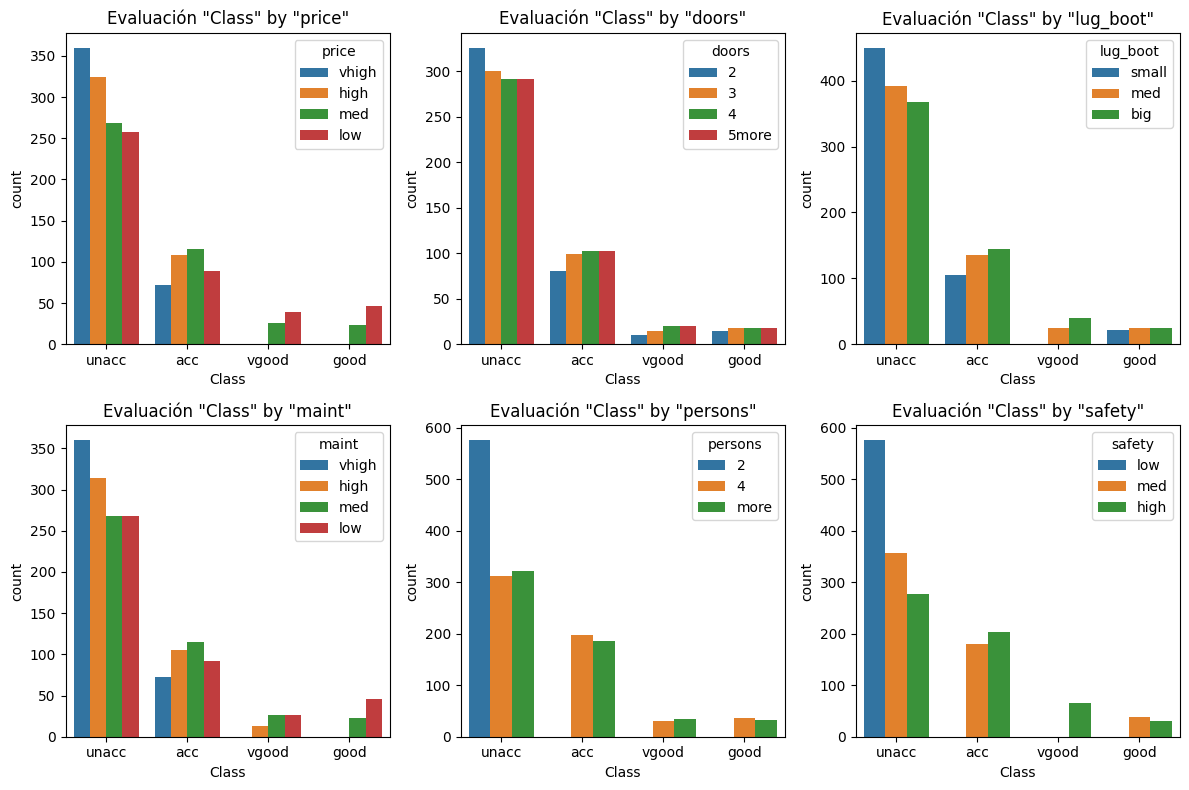

In [30]:
# Graficamos la variable Class Separada por los distintos atributos

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8))

for i, variable in enumerate(columns_names[:-1]):# Impresión de todas las columnas menos la ultima que es "Class"
    row = i % 2 #(Residuo de una división 0 si es exacta y 1 si no lo es) algoritmo para la ubicacion del grafico
    col = i // 2 #(Nos muestra la división sin decimales) algoritmo para la ubicación del grafico
    print(i,variable,row,col) # imprimimos solo para entender lo que está haciendo la función
    sns.countplot(data = df_car, x = 'Class', hue = variable, ax = axes[row][col])
    axes[row][col].set_title(f'Evaluación "Class" by "{variable}"')
plt.tight_layout() # acomoda de mejor forma los fraficos en el espacio
plt.show()    

# Insight

* Price: Los autos con precio bajo o medio tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de precio alto.

* Doors: Los autos con 4 o más puertas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de 3 o 2 puertas.

* Lug_boot: Los autos con maletero grande o mediano tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con maletero pequeño.

* Maint: Los autos con costos de mantenimiento bajos o medios tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con costos de mantenimiento altos.

* Persons: Los autos con capacidad de 4 o más personas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con capacidad de menos de 4 personas.

* Safety: Los autos con alto nivel de seguridad tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con bajo o medio nivel de seguridad.

# Feature Engineering

#### Feature Engineering

In [31]:
from imblearn.under_sampling import RandomUnderSampler

Undersample = RandomUnderSampler(random_state = 42)

In [32]:
# Declarando las variables predictoras y variable objetivo

X = df_car.drop('Class', axis = 1)
y = df_car.Class

In [33]:
#Se realiza el Undersamppling

X_car, y_car = Undersample.fit_resample(X,y)

In [34]:
# Confirmamos que todas las categorias tienen el mismo peso
y_car.value_counts()

Class
acc      65
good     65
unacc    65
vgood    65
Name: count, dtype: int64

### Codificación de las variables categóricas

Debido a que el algoritmo es compatible con datos numericos, es que transformaremos todas las columnas independientes.

In [35]:
#!pip install category_encoders 

In [36]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = columns_names[:-1]) #La funcion necesita el nombre de las columnas a transformar
X_car = encoder.fit_transform(X_car) # aplicamos la función a X_car

In [37]:
X_car

,price,maint,doors,persons,lug_boot,safety
1132,1,1,1,1,1,1
1078,1,2,2,1,1,1
1483,2,2,3,1,1,1
1415,2,2,4,2,2,2
395,3,3,3,2,1,2
...,...,...,...,...,...,...
1700,2,3,3,1,1,2
1715,2,3,2,2,3,2
1718,2,3,2,2,1,2
1724,2,3,2,1,3,2


#### Split Data - Training and Testing

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_car, y_car,test_size = 0.3 ,random_state = 42)

#### Entrenamiento del modelo

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Instancia del modelo
tree_car = DecisionTreeClassifier(random_state=42)

#### Optimización de parametros

In [40]:
from sklearn.model_selection import GridSearchCV

# parametros del decision tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

In [41]:
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_car, param_grid = param_grid, cv = 10, return_train_score = True)
grid_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             return_train_score=True)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             return_train_score=True)

In [43]:
# Imprimimos los resultados
print("Mejores hiperparametros encontrados")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzda")
print(grid_search.best_score_)

Mejores hiperparametros encontrados
{'criterion': 'entropy', 'max_depth': 4}
Mejor puntuación de validación cruzda
0.8026315789473685


In [44]:
# Modelo decisión Tree optimizado con los mejores parametros
best_tree_car = grid_search.best_estimator_
best_tree_car

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [45]:
# Predecimos con el modelo optimizado
X_pred_train = best_tree_car.predict(X_train) # esto lo hacemos para comparar posteriormente si el comportamiento es igual al test
y_pred_test = best_tree_car.predict(X_test)

#### Evaluación del modelo

In [46]:
from sklearn.metrics import accuracy_score

train_acc =  accuracy_score(y_train, X_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print("El accuracy en train es:",train_acc)
print("El accuracy en test es:",test_acc)

El accuracy en train es: 0.8131868131868132
El accuracy en test es: 0.717948717948718


La precisión en los conjuntos de datos de entrenamiento y prueba están muy cercanas, lo que sugiere que el modelo no está sufriendo de sobreajuste.

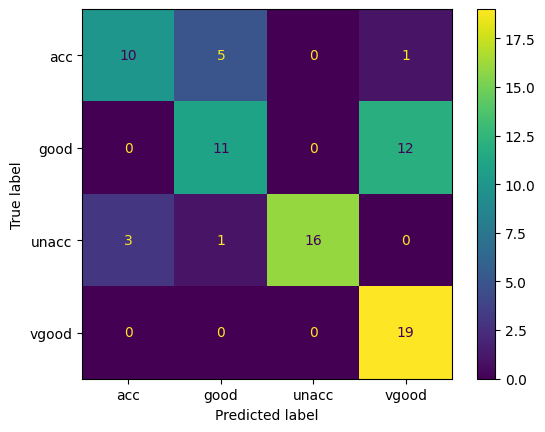

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test, labels = best_tree_car.classes_)
ConfusionMatrixDisplay(cm, display_labels = best_tree_car.classes_).plot();

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         acc       0.77      0.62      0.69        16
        good       0.65      0.48      0.55        23
       unacc       1.00      0.80      0.89        20
       vgood       0.59      1.00      0.75        19

    accuracy                           0.72        78
   macro avg       0.75      0.73      0.72        78
weighted avg       0.75      0.72      0.71        78



Podemos observar que el f1-score de la clase 'good' es relativamente bajo, mientras que el f1-score de 'unacc' es alto. Esto sugiere que el modelo tiene dificultades para clasificar correctamente las clase 'good'. Por otro lado, el f1-score de 'acc' y 'vgood' es promedio.

El f1-score promedio general es de 0.72, lo cual indica que el modelo tiene un buen rendimiento general en la clasificación de las distintas clases.



In [49]:
features_scores = pd.DataFrame(pd.Series(best_tree_car.feature_importances_, index = X_train.columns).sort_values(ascending = False)).T
features_scores

,safety,price,maint,persons,doors,lug_boot
0,0.333983,0.327521,0.182004,0.156493,0.0,0.0


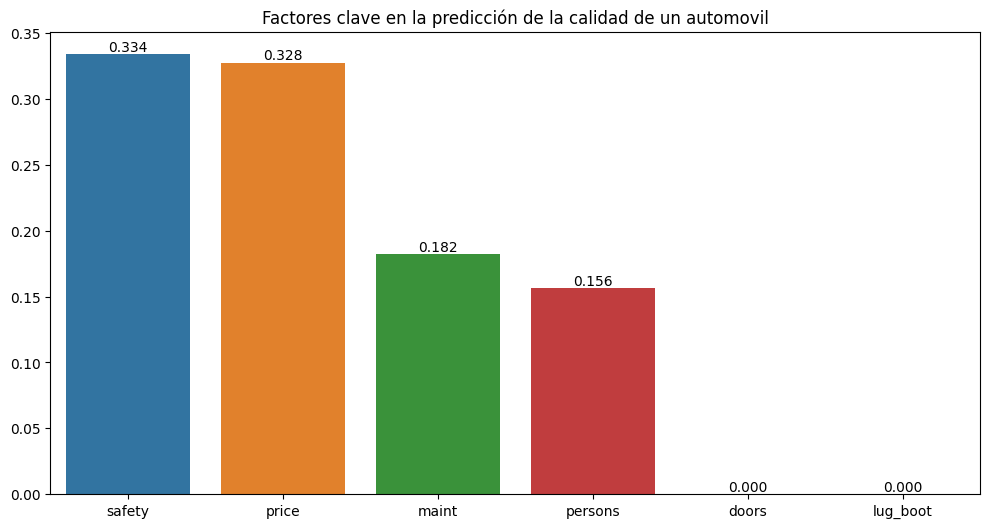

,0
safety,0.333983
price,0.327521
maint,0.182004
persons,0.156493
doors,0.000000
lug_boot,0.000000


In [50]:
plt.figure(figsize = (12,6))
sns.barplot(data = features_scores)

for index, value in enumerate(features_scores.values.flatten()):
    plt.annotate(f'{value:.3f}', xy = (index, value), ha = 'center', va = 'bottom')

plt.title('Factores clave en la predicción de la calidad de un automovil')
plt.show()
features_scores.T

El precio y el mantenimiento de un automóvil son factores cruciales en la determinación de su clasificación.

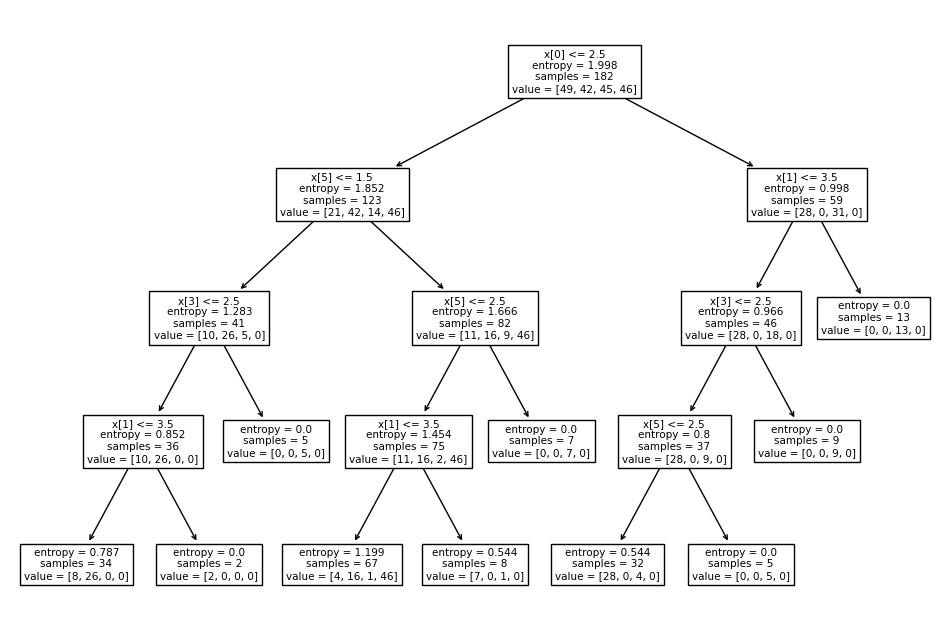

In [51]:
from sklearn import tree

plt.figure(figsize = (12,8))
tree.plot_tree(best_tree_car.fit(X_train, y_train));

# Introducción a random forest

## ¿Qué es un bosque aleatorio o random forest?
Random Forest es un algoritmo de aprendizaje automático de ensamble que combina múltiples árboles de decisión para producir una predicción más precisa y robusta. Es una técnica popular y poderosa en el campo del machine learning para tareas de clasificación y regresión.

## ¿Qué es un algoritmo de ensamble?
El término "ensamble" se refiere a la idea de combinar múltiples modelos de aprendizaje para mejorar la precisión y la estabilidad. En el caso de Random Forest, cada modelo en el ensamble es un árbol de decisión, y el conjunto completo de árboles se llama bosque.

## ¿Como se construye un bosque aleatorio?
El proceso de construcción de un bosque aleatorio comienza seleccionando una muestra aleatoria de los datos de entrenamiento para cada árbol de decisión. En cada árbol, se selecciona un subconjunto aleatorio de características de las muestras y se utiliza para entrenar el modelo. Esto se conoce como "muestreo de características" o "bagging".

La idea detrás del muestreo de características es reducir la correlación entre los árboles de decisión. Al seleccionar solo un subconjunto de características en cada árbol, se reduce la probabilidad de que los mismos predictores se utilicen en cada árbol y se mejora la capacidad del bosque para generalizar a nuevos datos.

Una vez que se han entrenado todos los árboles de decisión, se combina su salida para hacer una predicción final. En el caso de la clasificación, la predicción final es la clase que obtiene la mayoría de los votos de los árboles de decisión. En la regresión, la predicción final es el promedio de las predicciones de cada árbol.

# Problemas de overfitting
El sobreajuste (overfitting) es un problema común en los modelos de Random Forest, así como en otros algoritmos de aprendizaje automático. Ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y captura patrones específicos de ese conjunto de datos en lugar de generalizar para nuevos datos.

El Random Forest puede ser propenso al sobreajuste debido a la alta complejidad del modelo. Al construir múltiples árboles de decisión en paralelo y combinar sus predicciones, el Random Forest tiene una capacidad inherente para adaptarse y capturar los detalles más finos en los datos de entrenamiento.

Cuando el modelo se sobreajusta, puede resultar en un rendimiento deficiente en datos no vistos, como el conjunto de prueba o nuevos datos en producción. El modelo se vuelve demasiado sensible a las peculiaridades y el ruido del conjunto de entrenamiento, lo que dificulta su capacidad para generalizar correctamente.

Para mitigar el sobreajuste en Random Forest, se pueden utilizar diversas estrategias, como:

* Regularización: Ajustar los parámetros de regularización del modelo, como el número máximo de características consideradas en cada división del árbol o el número mínimo de muestras requeridas para crear un nodo.

* Validación cruzada: Utilizar técnicas de validación cruzada para evaluar el rendimiento del modelo en diferentes conjuntos de entrenamiento y prueba. Esto ayuda a detectar si el modelo está sobreajustado y permite ajustar los parámetros en consecuencia.

* Reducción de características: Eliminar características irrelevantes o redundantes del conjunto de datos para reducir la complejidad y evitar el sobreajuste.

* Aumento de datos: Generar datos sintéticos o aumentar la cantidad de datos de entrenamiento mediante técnicas como la interpolación o la rotación, lo que puede ayudar a mejorar la generalización del modelo.

# ¿Cuándo utilizar random forest?
#### Ventajas
* Funciona bien incluso sin ajuste de hiperparámetros: A diferencia de otros algoritmos, un Random Forest suele ofrecer buenos resultados incluso con los valores predeterminados de hiperparámetros. Esto significa que no siempre es necesario ajustarlos de forma exhaustiva para obtener un modelo decente.

* Reduce el riesgo de sobreajuste (overfitting): Al combinar múltiples árboles de decisión, el Random Forest disminuye la probabilidad de sobreajustar el modelo a los datos de entrenamiento, mejorando así su capacidad de generalización.

* Estabilidad frente a nuevas muestras de datos:  El modelo del Random Forest tiende a ser estable y mantiene un buen rendimiento al enfrentar nuevos conjuntos de datos. La combinación de predicciones de varios árboles reduce el impacto de datos atípicos y ruido, lo que lo hace robusto frente a la variación de los datos de entrada.

#### Desventajas
* Es más costoso en términos de creación y ejecución que un solo árbol de decisión: Un Random Forest está compuesto por múltiples árboles de decisión, lo que implica un mayor costo computacional tanto en tiempo de entrenamiento como en memoria requerida durante la ejecución. En comparación con un solo árbol de decisión, el Random Forest puede ser más exigente en recursos.

* No funciona bien con conjuntos de datos pequeños: El Random Forest requiere una cantidad suficiente de datos para obtener resultados confiables. En conjuntos de datos pequeños, hay un mayor riesgo de sobreajuste o de no aprovechar completamente la capacidad de generalización del algoritmo.

* Puede requerir mucho tiempo de entrenamiento: Debido a que el Random Forest se compone de múltiples árboles de decisión, el proceso de entrenamiento puede llevar más tiempo en comparación con un solo árbol de decisión. Cada árbol se entrena de forma independiente, lo que puede resultar en un tiempo total de entrenamiento prolongado, especialmente si se utilizan conjuntos de datos grandes o se requiere una alta precisión.

* La interpretación a veces se vuelve compleja: A medida que aumenta el número de árboles en el bosque, la interpretación del modelo se vuelve más desafiante. Determinar la importancia de las características o entender las relaciones entre las variables puede requerir técnicas adicionales y análisis más profundos.

# ¿Cuándo usar random forest?

* Rápido y fácil de aplicar: Es relativamente fácil de implementar y utilizar. Como con scikit-learn en Python, es rápido de aplicar en diferentes conjuntos de datos sin requerir una configuración exhaustiva.

* Técnicas de hyperparameter tuning: El Random Forest se beneficia de la aplicación de técnicas de ajuste de hiperparámetros, como grid search o búsqueda aleatoria, para encontrar la mejor combinación de configuraciones del modelo.

* Problemas de clasificación y regresión: El Random Forest es adecuado tanto para problemas de clasificación como de regresión. Puede manejar múltiples clases en problemas de clasificación y proporcionar predicciones numéricas en problemas de regresión.

* Conjuntos de datos grandes: El Random Forest es especialmente efectivo cuando se trabaja con conjuntos de datos grandes. Con más datos disponibles, los árboles individuales del Random Forest pueden aprender patrones más complejos y realizar predicciones más precisas.



# Tu primer random forest con scikit-learn

Utilizaremos el dataset Pima indians diabetes de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

### Conociendo nuestro dataset
El conjunto de datos contiene información médica de mujeres Pima Indian de Arizona, Estados Unidos, que participaron en un estudio de la diabetes en la década de 1980.

El conjunto de datos consta de 768 instancias y 9 atributos, incluyendo el número de veces que una mujer ha estado embarazada, su edad, presión arterial diastólica, índice de masa corporal, concentración de glucosa en plasma y la presencia o ausencia de diabetes en la prueba.

### Atributos
* preg: Número de veces embarazada
* plas: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
* pres: Presión arterial diastólica (mm Hg)
* skin: Grosor del pliegue cutáneo tricipital (mm)
* test: Concentración de insulina en suero a las 2 horas (mu U/ml)
* mass: Índice de masa corporal (peso en kg/(altura en m)^2)
* pedi: Función de diabetes basada en antecedentes familiares
* age: Edad (años)
* class: Variable de clase (1: positivo para diabetes, 0: negativo para diabetes en la prueba)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_diabetes = pd.read_csv('pima-indians-diabetes.csv', sep = ',')

df_columns = np.array(['preg','plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'Class'])
df_diabetes.columns = df_columns

In [3]:
df_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   Class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todos los datos sin tipo numerico

In [5]:
df_diabetes.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
Class    0
dtype: int64

In [6]:
df_diabetes.duplicated().sum()

0

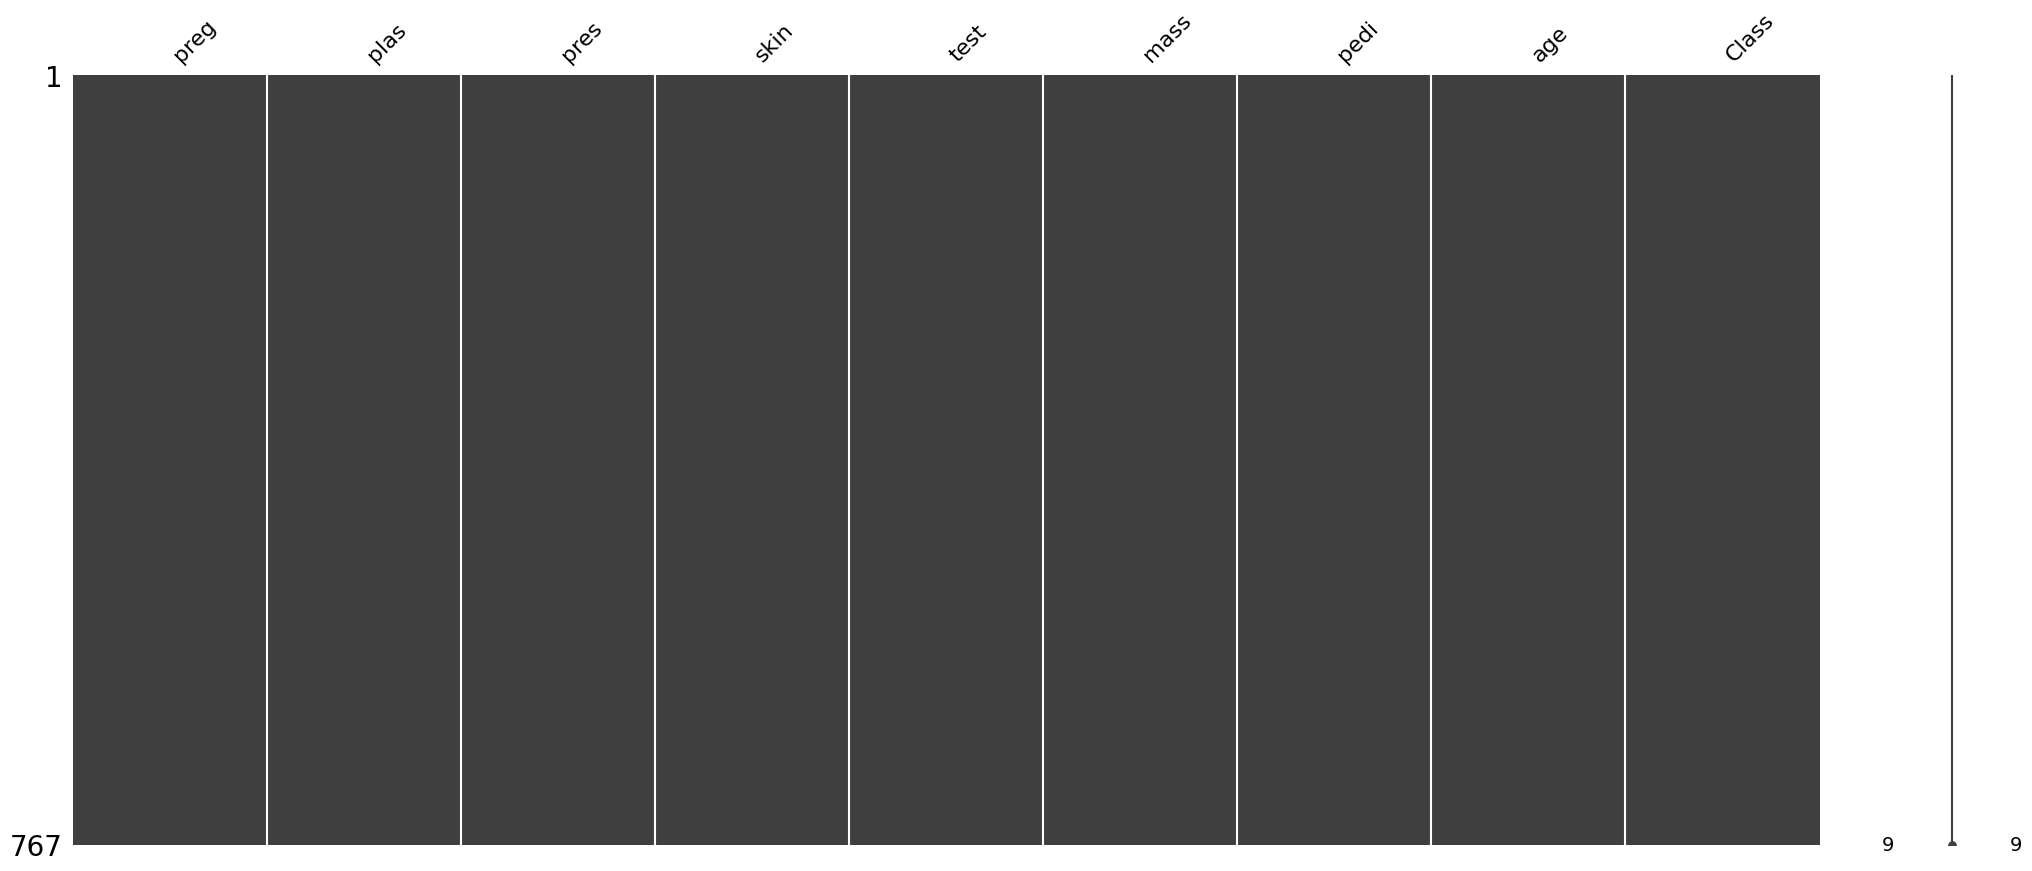

In [7]:
import missingno as miss

miss.matrix(df_diabetes);

No existen datos duplicados ni nulos, por lo que podemos seguir con el pre-processing

In [8]:
df_diabetes.iloc[:, 1:6].replace(to_replace=[0], value=np.nan).isna().sum().reset_index(name = 'missing_values').rename(columns={"index": "variable"}).assign( percentage = lambda df_reset: df_reset.missing_values / len(df_diabetes) * 100)

,variable,missing_values,percentage
0,plas,5,0.651890
1,pres,35,4.563233
2,skin,227,29.595828
3,test,373,48.631030
4,mass,11,1.434159


#### Proporcion de la variable objetivo

In [9]:
np.unique(df_diabetes.Class, return_counts = True)

(array([0, 1]), array([500, 267]))

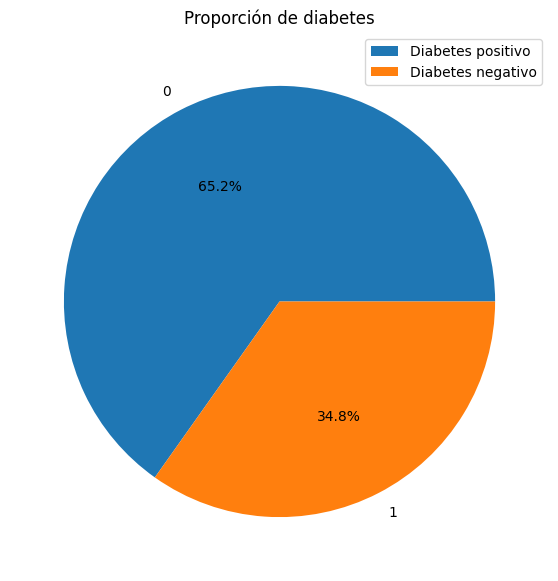

Class
0    500
1    267
Name: count, dtype: int64


In [10]:
plt.figure(figsize = (7,7))

labels, counts = np.unique(df_diabetes.Class, return_counts = True)
plt.pie(counts, autopct = '%1.1f%%', labels = labels)
plt.legend({'Diabetes negativo', 'Diabetes positivo'})
plt.title('Proporción de diabetes')
plt.show()

print(df_diabetes.Class.value_counts())

### Entrenamiento de Random Forest con scikit-learn

In [11]:
#Separamos X e y

X_diabetes = df_diabetes.drop('Class', axis = 1)
y_diabetes = df_diabetes.Class

In [12]:
# Separamos data de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size = 0.2, random_state = 42)

In [13]:
X_train.shape , y_train.shape

((613, 8), (613,))

In [14]:
#Importamos el bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo
rfc = RandomForestClassifier(random_state = 42)

In [15]:
# Optimizacion de parametros
from sklearn.model_selection import GridSearchCV

#Definimos los hiperparárametros y sus posibles valores
param_grid = {
        'n_estimators' : [10, 25, 50],
        'max_depth'    : [5, 10, 15],
        'criterion'    : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]
}

In [16]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['mse', 'mae', 'gini', 'entropy',
                                       'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy')

In [17]:
# Ajustamos el modelo con grid_search
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/sit

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['mse', 'mae', 'gini', 'entropy',
                                       'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy')

In [18]:
#Obtenemos el mejoer modelo
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [19]:
# Mejores parametros del modelo
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [20]:
# comparamos los accuracy de los train y test
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
Accuracy_train = accuracy_score(y_train, y_train_pred)
Accuracy_test  = accuracy_score(y_test, y_test_pred)

print(Accuracy_train)
print(Accuracy_test)

0.8417618270799347
0.7597402597402597


In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        97
           1       0.67      0.68      0.68        57

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



* El modelo de Random Forest, con parámetros optimizados, alcanzó una precisión general del 76% y un promedio ponderado del 74%.

* El F1-score para la clase "0" fue de 81%, indicando una buena capacidad para identificar casos negativos. Sin embargo, el F1-score para la clase "1" fue de 68%, mostrando un rendimiento ligeramente inferior en la detección de casos positivos.

* En general, el modelo demostró un rendimiento satisfactorio.

#### Análisis de las importancias de los features

In [42]:
Feature_score.values.flatten()

array([0.30173726, 0.22926144, 0.15353767, 0.10207985, 0.07296755,
       0.05836569, 0.04636886, 0.03568167])

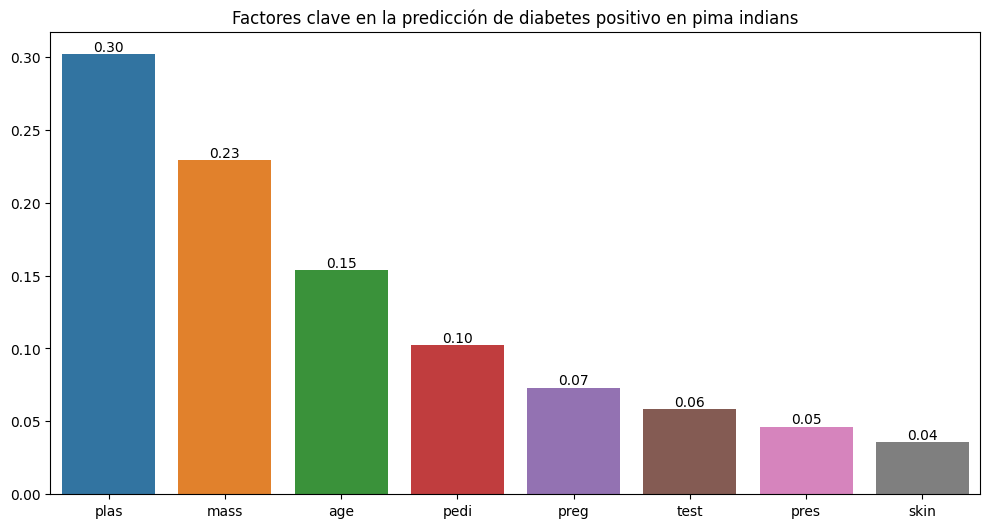

,0
plas,0.301737
mass,0.229261
age,0.153538
pedi,0.102080
preg,0.072968
test,0.058366
pres,0.046369
skin,0.035682


In [59]:
Feature_score = pd.DataFrame(pd.Series(best_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)).T

plt.figure(figsize = (12,6))
sns.barplot(Feature_score)

for index, value in enumerate(Feature_score.values.flatten()):
    plt.annotate(f'{value:.2f}', xy = (index,value), ha = 'center', va = 'bottom')
    plt.title("Factores clave en la predicción de diabetes positivo en pima indians")
plt.show()

Feature_score.T

Un análisis de las importancias de las características revela que las características más influyentes para la predicción del modelo son:

* plas: Con una importancia de 0.301737, se destaca como la característica más importante. Esto indica que la concentración de glucosa en plasma sanguíneo tiene un impacto significativo en la predicción de la diabetes.

* mass: El índice de masa corporal (IMC) es la segunda característica más relevante, con una importancia de 0.229261. Esto sugiere que el peso relativo a la altura también juega un papel crucial en la predicción de la diabetes.

* age: La edad se posiciona como la tercera característica más importante, con una importancia de 0.153538. Esto indica que la edad de la paciente también contribuye significativamente a la predicción de la enfermedad.

* pedi: El valor de pedigree diabetes function (pedi) tiene una importancia de 0.102080. Esto sugiere que el historial familiar de diabetes puede tener un impacto en la predicción de la enfermedad.

Las características restantes, como test, preg, pres y skin tienen importancias relativamente más bajas en comparación con las anteriores, pero aún contribuyen al proceso de predicción.

Estos resultados resaltan la importancia de características clave como la concentración de glucosa, el índice de masa corporal, la edad y el historial familiar en la predicción de la diabetes en el conjunto de datos.